In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

## 我們一樣先讀進來 ETF 資料

In [3]:
df = pd.read_csv('../etf_data/AFK.csv')

# 這一次我們先來把資料做一些前處理

## 如果你有看過資料會發現有些欄位有0值，而這個應該要去除的

In [4]:
df[102:108]

,Date,Open,High,Low,Close,Volume,Adj Close
102,2016-09-20,20.379999,20.379999,20.049999,20.049999,1500,19.512619
103,2016-09-19,20.469999,20.500000,20.030001,20.030001,2800,19.493157
104,2016-09-16,20.110001,20.110001,20.110001,20.110001,300,19.571012
105,2016-09-15,20.020000,20.020000,20.020000,20.020000,0,19.483424
106,2016-09-14,19.980000,20.120001,19.889999,20.020000,9600,19.483424
107,2016-09-13,20.299999,20.299999,19.900000,19.910000,16800,19.376372


In [9]:
L = np.array([-2,3,2,9,-10,17,5])
L>0
L[L>0]

array([ 3,  2,  9, 17,  5])

In [5]:
df1 = df.loc[df.Volume !=0 ] # 保留那些正常的欄位

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-02-15,21.620001,21.870001,21.520000,21.820000,11500,21.820000
1,2017-02-14,21.930000,21.950001,21.469999,21.629999,15000,21.629999
2,2017-02-13,21.760000,21.760000,21.510000,21.670000,9800,21.670000
3,2017-02-10,21.360001,21.719999,21.360001,21.450001,11400,21.450001
4,2017-02-09,21.320000,21.950001,21.320000,21.450001,6800,21.450001


In [12]:
df.loc[1:4,['High','Low']]

,High,Low
1,21.950001,21.469999
2,21.760000,21.510000
3,21.719999,21.360001
4,21.950001,21.320000


In [14]:
df.Volume

0       11500
1       15000
2        9800
3       11400
4        6800
5        1700
6       12700
7       29200
8        4500
9        7400
10      17800
11       6000
12      13600
13       9900
14       7000
15       7500
16      16900
17       3000
18       3700
19      11800
20      20400
21      16600
22      14200
23       8400
24      27700
25      12100
26      11300
27       7800
28       8300
29       7300
        ...  
2135     3700
2136     6400
2137     1100
2138     1600
2139     5500
2140      500
2141     1000
2142     1500
2143     2500
2144     3100
2145     3200
2146     2000
2147    53200
2148    10500
2149     1300
2150     3800
2151     4700
2152     5700
2153     1200
2154     1600
2155     2900
2156     2200
2157    16800
2158     5900
2159     3400
2160     8100
2161     6900
2162     1500
2163     1400
2164     4000
Name: Volume, dtype: int64

In [6]:
df1[102:108]

,Date,Open,High,Low,Close,Volume,Adj Close
102,2016-09-20,20.379999,20.379999,20.049999,20.049999,1500,19.512619
103,2016-09-19,20.469999,20.500000,20.030001,20.030001,2800,19.493157
104,2016-09-16,20.110001,20.110001,20.110001,20.110001,300,19.571012
106,2016-09-14,19.980000,20.120001,19.889999,20.020000,9600,19.483424
107,2016-09-13,20.299999,20.299999,19.900000,19.910000,16800,19.376372
108,2016-09-12,20.020000,20.559999,19.940001,20.540001,44000,19.989488


In [15]:
df1.reset_index(drop=True, inplace=True)#drop=True會把之前的index去掉，inplace=True會把原來的資料表改掉
#shift+tab可以看drop,inplace...等參數

In [19]:
df1[102:108]

,Date,Open,High,Low,Close,Volume,Adj Close
102,2016-09-20,20.379999,20.379999,20.049999,20.049999,1500,19.512619
103,2016-09-19,20.469999,20.500000,20.030001,20.030001,2800,19.493157
104,2016-09-16,20.110001,20.110001,20.110001,20.110001,300,19.571012
105,2016-09-14,19.980000,20.120001,19.889999,20.020000,9600,19.483424
106,2016-09-13,20.299999,20.299999,19.900000,19.910000,16800,19.376372
107,2016-09-12,20.020000,20.559999,19.940001,20.540001,44000,19.989488


In [16]:
df_adj_cl = df1[['Date', 'Adj Close']]

In [17]:
df_adj_cl.head()

,Date,Adj Close
0,2017-02-15,21.820000
1,2017-02-14,21.629999
2,2017-02-13,21.670000
3,2017-02-10,21.450001
4,2017-02-09,21.450001


In [22]:
df_adj_cl = df_adj_cl.sort_values(by='Date')

In [ ]:
df_adj_cl.head()

In [30]:
x0 = df_adj_cl["Adj Close"].values

In [31]:
x0

array([ 33.730652,  34.309124,  32.915902, ...,  21.67    ,  21.629999,
        21.82    ])

In [32]:
m = max(x0)

In [33]:
x0 = x0/m

In [34]:
x0

array([ 0.98313941,  1.        ,  0.95939208, ...,  0.63161041,
        0.63044451,  0.63598243])

In [36]:
n = len(x0)
p = 20 #20期
n

2160

In [37]:
[2*k for k in range(10)] #list comprehension 

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [38]:
x = np.array([x0[k:k+p] for k in range(n-p+1)] )

In [46]:
x[0]

array([ 0.98313941,  1.        ,  0.95939208,  0.99453813,  0.97364045,
        0.97601513,  0.97435283,  0.95701729,  0.93350748,  0.93801946,
        0.94253141,  0.94158157,  0.9693659 ,  0.96509139,  0.9522678 ,
        0.941819  ,  0.93493226,  0.93730706,  0.92519588,  0.91094751])

In [47]:
y = np.array(x0[p:])

In [48]:
y[0]

0.90192349417023887

In [49]:
len(x)

2141

In [50]:
len(y)

2140

In [51]:
X = x[:-1]

In [52]:
y = y

In [53]:
len(X) == len(y)

True

In [54]:
X.shape

(2140, 20)

In [55]:
X.shape=(2140,20,1)

In [56]:
X.shape

(2140, 20, 1)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train

array([[[ 0.75978119],
        [ 0.74812344],
        [ 0.75572632],
        ..., 
        [ 0.70757475],
        [ 0.69059499],
        [ 0.69895815]],

       [[ 0.69484456],
        [ 0.69939699],
        [ 0.68526052],
        ..., 
        [ 0.67807243],
        [ 0.69077132],
        [ 0.67184283]],

       [[ 0.84043766],
        [ 0.8164636 ],
        [ 0.80972933],
        ..., 
        [ 0.82104291],
        [ 0.82454478],
        [ 0.82481415]],

       ..., 
       [[ 0.49070402],
        [ 0.49214165],
        [ 0.49693364],
        ..., 
        [ 0.55108361],
        [ 0.55395885],
        [ 0.56785574]],

       [[ 0.55908545],
        [ 0.56901339],
        [ 0.57695577],
        ..., 
        [ 0.55936911],
        [ 0.56816248],
        [ 0.56901339]],

       [[ 0.70084337],
        [ 0.68447653],
        [ 0.70304191],
        ..., 
        [ 0.69571345],
        [ 0.68960641],
        [ 0.66835396]]])

In [60]:
y_train

array([ 0.68730041,  0.66585279,  0.82616097, ...,  0.56234487,
        0.57950868,  0.64734573])

In [61]:
model = Sequential()

In [62]:
model.add(Conv1D(50,
                 4,
                 padding='same',
                 activation='relu', input_shape=(p,1)
                ))

In [63]:
model.add(MaxPooling1D(2))

In [64]:
model.add(Flatten())

In [65]:
model.add(Dense(20))
model.add(Dropout(0.2))#avoid overfitting
model.add(Activation('relu'))

In [66]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [74]:
model.compile(loss='mse',
              optimizer=Adam(lr=0.01),#SGD
              metrics=['accuracy'])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 20, 50)            250       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                10020     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
__________

In [76]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1712/1712 [==============================] - 0s - loss: 0.0050 - acc: 0.0000e+00     
Epoch 2/50
1712/1712 [==============================] - 0s - loss: 0.0022 - acc: 0.0000e+00     
Epoch 3/50
1712/1712 [==============================] - 0s - loss: 0.0015 - acc: 0.0000e+00     
Epoch 4/50
1712/1712 [==============================] - 0s - loss: 0.0013 - acc: 0.0000e+00     
Epoch 5/50
1712/1712 [==============================] - 0s - loss: 0.0012 - acc: 0.0000e+00     
Epoch 6/50
1712/1712 [==============================] - 0s - loss: 0.0014 - acc: 0.0000e+00     
Epoch 7/50
1712/1712 [==============================] - 0s - loss: 0.0012 - acc: 0.0000e+00     
Epoch 8/50
1712/1712 [==============================] - 0s - loss: 0.0015 - acc: 0.0000e+00     
Epoch 9/50
1712/1712 [==============================] - 0s - loss: 0.0014 - acc: 0.0000e+00     
Epoch 10/50
1712/1712 [==============================] - 0s - loss: 0.0012 - acc: 0.0000e+00     
Epoch 11/50
1712/1712 [======

In [77]:
y_predict = model.predict(X_test).ravel()#reshape()也可以

In [78]:
y_predict

array([ 0.8709169 ,  0.57403439,  0.71839088,  0.78466457,  0.81375688,
        0.81142044,  0.6852178 ,  0.56504059,  0.72878808,  0.54159808,
        0.72544587,  0.66453147,  0.49156967,  0.73757201,  0.72126532,
        0.79810655,  0.80619305,  0.82430148,  0.87575924,  0.7830683 ,
        0.50212348,  0.79505116,  0.87784779,  0.74053061,  0.73858386,
        0.73354626,  0.77427197,  0.81481242,  0.51940954,  0.77594888,
        0.59146214,  0.67575955,  0.83449489,  0.46205992,  0.59025747,
        0.7651909 ,  0.79161471,  0.83009046,  0.50015676,  0.79959875,
        0.6686731 ,  0.61737728,  0.68918306,  0.77453083,  0.80237681,
        0.58953196,  0.60830057,  0.57542449,  0.80184448,  0.82641631,
        0.61511976,  0.69691837,  0.83651352,  0.6977033 ,  0.6263966 ,
        0.78148472,  0.56775475,  0.80078024,  0.71371937,  0.78161454,
        0.74529511,  0.75276536,  0.69020337,  0.88629335,  0.55104637,
        0.78360593,  0.77811968,  0.77042508,  0.5889864 ,  0.48

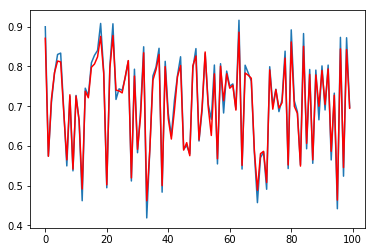

In [79]:
plt.plot(y_test[:100])#取100筆出來
plt.plot(y_predict[:100],'r')